In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import requests
import matplotlib
#'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 
#'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 
#'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
#'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel',
#'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

idx_pd = pd.IndexSlice

**GUTHUB REPO**
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [25]:
file_github = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/\
master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [26]:
data = []
with requests.Session() as s:
    download = s.get(file_github)

    decoded_content = download.content.decode()

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        if row[2]=='Korea':
            print(row)
        data.append(row)

In [27]:
df = pd.DataFrame(data[1:], columns=data[0])
df = df.drop(columns=['Lat', 'Long'])

In [28]:
column_dates = df.columns[2:]

In [29]:
df[column_dates] = df[column_dates].replace('', np.NaN)

In [30]:
dict_types = {}
for idx, col in enumerate(df.columns[:]):
    if idx>1:
        col_type = np.float64
    else:
        col_type = 'object'
    dict_types[col] = col_type
df = df.iloc[:,:].astype(dict_types)

In [31]:
def getting_max(x):
    print(x)
    
def new_name(x):
    if x['Province/State'] =='' or x['Province/State']==x['Country/Region']:
        name = x['Country/Region']
    else:
        name = x['Country/Region'] + '-' + x['Province/State']
    return name

In [32]:
df['Name'] = df.apply(new_name, axis=1)

In [33]:
df = df.reset_index(drop=True)
df = df.drop(columns=['Province/State', 'Country/Region'])
df = df.set_index('Name')
df = df.sort_values(by=df.columns[-1], ascending=False)
df.head(50)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,7.0,8.0,8.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,12.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,15.0,15.0,15.0,51.0,51.0,57.0,58.0,60.0,68.0,74.0,98.0,118.0,149.0,217.0,262.0,402.0,518.0,583.0,959.0,1281.0,1663.0,2179.0,2727.0,3499.0,4632.0,6421.0,7783.0,13747.0,19273.0,25600.0,33276.0,43843.0,53736.0,65778.0,83836.0,101657.0,121465.0,140909.0,161831.0,188172.0,213242.0,243622.0,275367.0,308650.0,336802.0,366317.0,397121.0,428654.0,462780.0,496535.0,526396.0,555313.0,580619.0,607670.0,636350.0,667592.0,699706.0,732197.0,758809.0,784326.0,811865.0,840351.0,869170.0,905358.0,938154.0,965785.0,988197.0,1012582.0,1039909.0,1069424.0,1103461.0,1132539.0,1158040.0,1180375.0,1204351.0,1229331.0,1257023.0,1283929.0,1309550.0,1329260.0,1347881.0,1369376.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,13.0,13.0,17.0,17.0,20.0,20.0,28.0,45.0,59.0,63.0,90.0,114.0,147.0,199.0,253.0,306.0,367.0,438.0,495.0,658.0,840.0,1036.0,1264.0,1534.0,1836.0,2337.0,2777.0,3548.0,4149.0,4731.0,5389.0,6343.0,7497.0,8672.0,10131.0,11917.0,13584.0,15770.0,18328.0,21102.0,24490.0,27938.0,32008.0,36793.0,42853.0,47121.0,52763.0,57999.0,62773.0,68622.0,74588.0,80949.0,87147.0,93558.0,99399.0,106498.0,114431.0,124054.0,134687.0,145268.0,155370.0,165929.0,177160.0,187859.0,198676.0,209688.0,221344.0,232243.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,13.0,15.0,32.0,45.0,84.0,120.0,165.0,222.0,259.0,400.0,500.0,673.0,1073.0,1695.0,2277.0,2277.0,5232.0,6391.0,7798.0,9942.0,11748.0,13910.0,17963.0,20410.0,25374.0,28768.0,35136.0,39885.0,49515.0,57786.0,65719.0,73235.0,80110.0,87956.0,95923.0,104118.0,112065.0,119199.0,126168.0,131646.0,136675.0,141942.0,148220.0,153222.0,158273.0,163027.0,166831.0,170099.0,172541.0,177644.0,184948.0,190839.0,191726.0,198674.0,200210.0,204178.0,208389.0,213024.0,202990.0,205905.0,207634.0,209465.0,210773.0,212917.0,213435.0,215216.0,216582.0,217466.0,218011.0,219329.0,220325.0,221447.0,222857.0,223578.0,224350.0,227436.0,228030.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,13.0,13.0,13.0,15.0,20.0,23.0,36.0,40.0,51.0,85.0,115.0,163.0,206.0,273.0,321.0,382.0,456.0,456.0,798.0,1140.0,1140.0,1543.0,1950.0,2626.0,2689.0,3983.0,5018.0,5683.0,6650.0,8077.0,9529.0,11658.0,14543.0,17089.0,19522.0,22141.0,25150.0,29474.0,33718.0,38168.0,41903.0,47806.0,51608.0,55242.0,60733.0,65077.0,73758.0,78991.0,84279.0,88621.0,93873.0,98476.0,103093.0,108692.0,114217.0,120067.0,124743.0,129044.0,133495.0,138078.0,143464.0,148377.0,152840.0,157149.0,161145.0,165221.0,171253.0,177454.0,182260.0,186599.0,190584.0,194990.0,201101.0,206715.0,211364.0,215260.0,219183.0,223060.0,226463.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [11]:
df.index.tolist()

['US',
 'Russia',
 'Spain',
 'United Kingdom',
 'Italy',
 'Brazil',
 'France',
 'Germany',
 'Turkey',
 'Iran',
 'India',
 'Peru',
 'China-Hubei',
 'Belgium',
 'Netherlands',
 'Saudi Arabia',
 'Canada-Quebec',
 'Mexico',
 'Pakistan',
 'Chile',
 'Ecuador',
 'Switzerland',
 'Portugal',
 'Sweden',
 'Qatar',
 'Belarus',
 'Singapore',
 'Ireland',
 'Canada-Ontario',
 'United Arab Emirates',
 'Poland',
 'Bangladesh',
 'Israel',
 'Ukraine',
 'Japan',
 'Austria',
 'Romania',
 'Indonesia',
 'Colombia',
 'South Africa',
 'Philippines',
 'Korea, South',
 'Dominican Republic',
 'Denmark',
 'Kuwait',
 'Serbia',
 'Egypt',
 'Panama',
 'Czechia',
 'Norway',
 'Malaysia',
 'Argentina',
 'Morocco',
 'Canada-Alberta',
 'Algeria',
 'Finland',
 'Bahrain',
 'Kazakhstan',
 'Moldova',
 'Ghana',
 'Afghanistan',
 'Nigeria',
 'Luxembourg',
 'Oman',
 'Armenia',
 'Hungary',
 'Australia-New South Wales',
 'Thailand',
 'Bolivia',
 'Iraq',
 'Greece',
 'Azerbaijan',
 'Cameroon',
 'Uzbekistan',
 'Canada-British Columbia',

In [12]:
names_to_plot =  ['Colombia', 'Argentina', 'Peru', 'Chile', 'Mexico', 'Ecuador']

In [13]:
for per_name in df.index.tolist()[:10]:
    if per_name not in names_to_plot:
        names_to_plot.append(per_name)

In [14]:
names_to_plot

['Colombia',
 'Argentina',
 'Peru',
 'Chile',
 'Mexico',
 'Ecuador',
 'US',
 'Russia',
 'Spain',
 'United Kingdom',
 'Italy',
 'Brazil',
 'France',
 'Germany',
 'Turkey',
 'Iran']

In [15]:
personal_names = ['Japan', 'Singapore', 'China-Hong Kong', 'US', 'Norway', 'Sweden',
                   'Panama', 'Colombia', 'Peru', 'Chile', 'Argentina', 'Ecuador',  'Russia',
                  'Mexico', 'Brazil', 'Uruguay', 'Dominican Republic', 'Turkey', 'Russia', 'India']

In [16]:
for per_name in personal_names:
    if per_name not in names_to_plot:
        names_to_plot.append(per_name)

In [17]:
names_to_plot

['Colombia',
 'Argentina',
 'Peru',
 'Chile',
 'Mexico',
 'Ecuador',
 'US',
 'Russia',
 'Spain',
 'United Kingdom',
 'Italy',
 'Brazil',
 'France',
 'Germany',
 'Turkey',
 'Iran',
 'Japan',
 'Singapore',
 'China-Hong Kong',
 'Norway',
 'Sweden',
 'Panama',
 'Uruguay',
 'Dominican Republic',
 'India']

In [18]:
population = [49.65, 44.49, 31.99, 18.73, 126.2, 
              17.08, 328.2, 46.94, 60.36, 66.99, 
              83.02, 66.65, 82, 81.8, 144.5, 59.02,
              126.5, 5.639, 7.451, 5.368, 10.23,
              4.177, 209.5, 3.449, 10.63, 1353.0]

In [19]:
dict_population = {'Colombia': 49.65,
                   'Argentina': 44.49,
                   'Peru': 31.99,
                   'Chile': 18.73,
                   'Mexico': 126.2,
                   'Ecuador': 17.08,
                   'US': 328.2,
                   'Spain': 46.94,
                   'Italy': 60.36,
                   'France': 66.99,
                   'Germany': 83.02,
                   'United Kingdom': 66.65,
                   'Turkey': 82,
                   'Iran': 81.8,
                   'Russia': 144.5,
                   'China-Hubei': 59.02,
                   'Japan': 126.5,
                   'Singapore': 5.639,
                   'China-Hong Kong': 7.451,
                   'Norway': 5.368,
                   'Sweden': 10.23,
                   'Panama': 4.177,
                   'Brazil': 209.5,
                   'Uruguay': 3.449,
                   'Dominican Republic': 10.63,
                   'India': 1353.0,
                   'Cuba': 11.34,
                   'Bolivia': 11.35,
                   'Honduras': 9.588,
                   'Guatemala': 17.25,
                   'Costa Rica': 4.999,
                   'El Salvador': 6.421,
                   'Paraguay': 6.956}

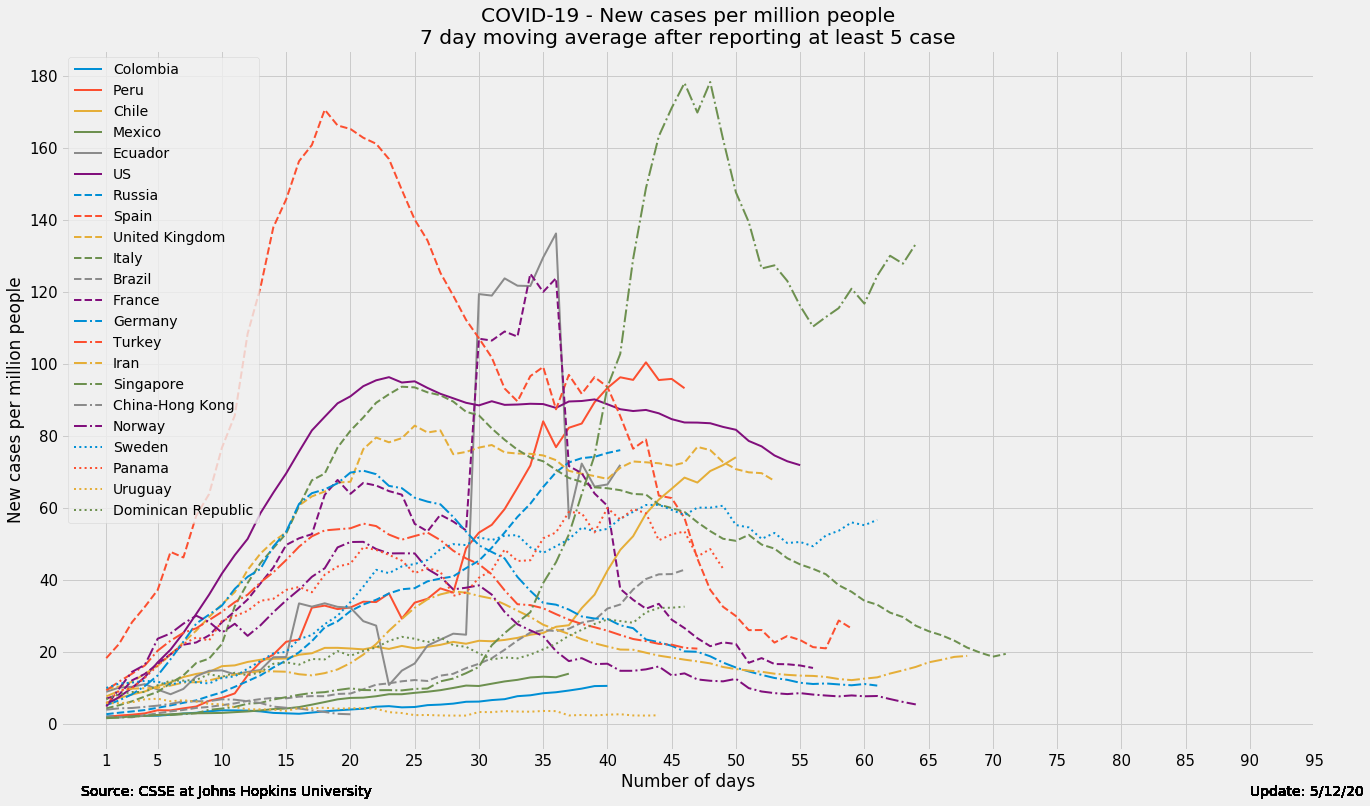

In [35]:
fig, ax = plt.subplots(figsize=(20,12))
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
colors = [f'C{i}' for i in range(6)]

low_cases = 5
high_cases = 2000000
max_periods = 100
ls = 0
count = 0
window = 7
for name in names_to_plot:
    row = df.loc[name, :]
    if name in names_to_plot:
        if (row.min()<0.1*high_cases) & (name not in []):
            current_data = row[(row>=low_cases) & (row<=high_cases)]#/dict_population[name]).rolling(7).mean()
            current_data = current_data - current_data.shift(1)
            current_data = (current_data/dict_population[name])
            current_data = current_data[current_data>1]
            current_data = current_data.rolling(window).mean()
            if current_data.max()<5:
                continue
            if len(current_data)>0:
                c_i = colors[count]
                ls_i = LINE_STYLES[ls]
                values_to_plot = current_data.values[window+1:max_periods]
                if name in []:
                    ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=5.5, 
                            linestyle=ls_i, color=c_i, alpha=0.7)
                else:
                    ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=2., 
                            linestyle=ls_i, color=c_i)
            # Changing colors
            if count>4:
                count=0
                ls+=1
            else:
                count+=1
        else:
            pass
    ax.legend(fontsize=14, loc=2)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_yticks([20*i for i in range(0,10)])
    ax.set_xticks([1] + list(range(5, max_periods,5)))
    ax.set_xlabel(f'Number of days')
    ax.set_ylabel("New cases per million people")
    ax.text(max_periods*0.9, -20, f'Update: {df.columns[-1]}')
    ax.text(-1, -20, 'Source: CSSE at Johns Hopkins University')
    ax.set_title(f"COVID-19 - New cases per million people\n7 day moving average after reporting at least {low_cases} case")
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
plt.show()

In [36]:
latin_names_plot = ['Colombia',
              'Argentina',
              'Peru',
              'Chile',
              'Mexico',
              'Panama',
              'Brazil',
              'Uruguay',
              'Dominican Republic', 
              'Cuba',
              'Bolivia',
              'Honduras',
              'Guatemala',
              'Costa Rica',
              'El Salvador',
              'Paraguay']

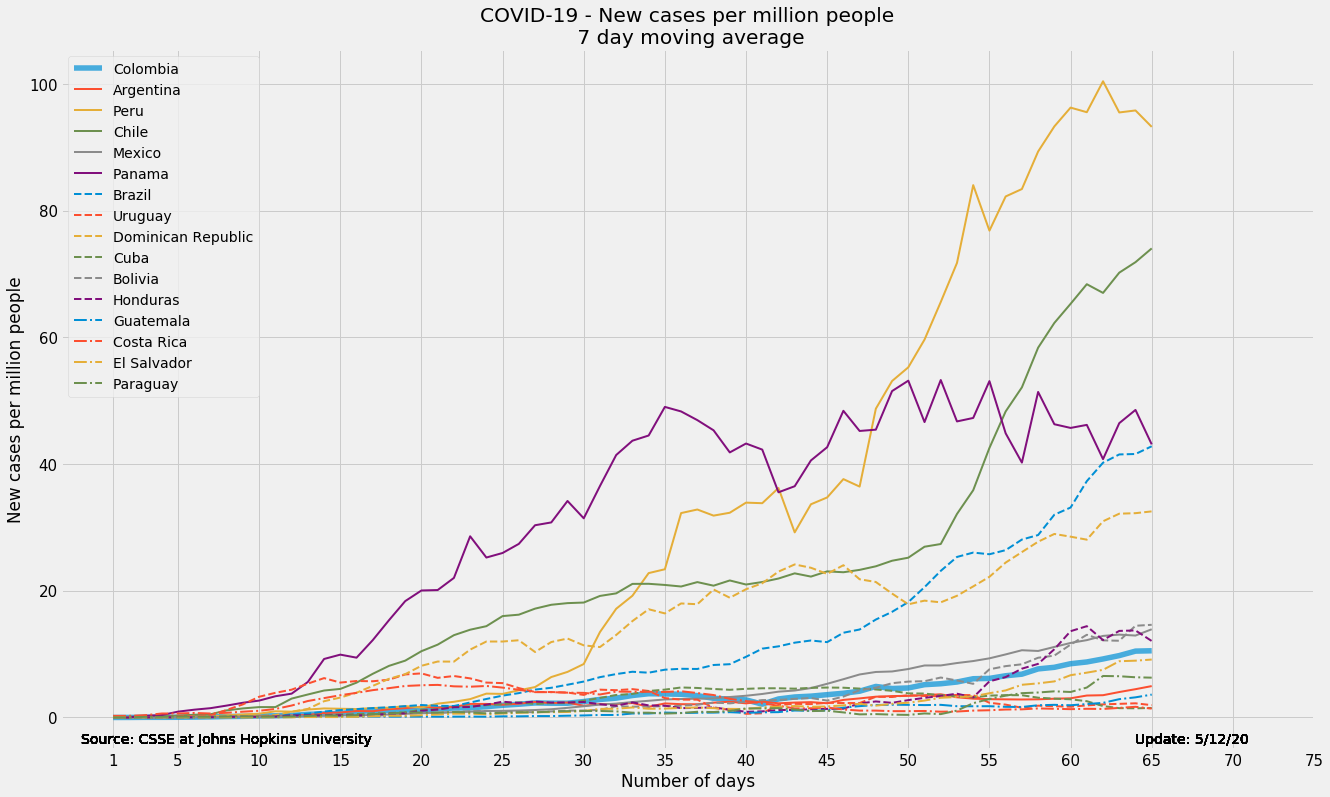

In [37]:
fig, ax = plt.subplots(figsize=(20,12))
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
colors = [f'C{i}' for i in range(6)]

low_cases = 0
high_cases = 2000000
max_periods = 80
ls = 0
count = 0
window = 7
text_loc_y = -4
for name in latin_names_plot:
    row = df.loc[name, :]
    if name in latin_names_plot:
        if (row.min()<0.1*high_cases) & (name not in []):
            current_data = row[(row>=low_cases) & (row<=high_cases)]#/dict_population[name]).rolling(7).mean()
            current_data = current_data - current_data.shift(1)
            current_data = (current_data/dict_population[name]).rolling(window).mean()
            current_data = current_data[~current_data.isnull()]
            if current_data.max()>1000:
                continue
            if len(current_data)>0:
                c_i = colors[count]
                ls_i = LINE_STYLES[ls]
                values_to_plot = current_data.values[40:]
                if name in ['Colombia']:
                    ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=5.5, 
                            linestyle=ls_i, color=c_i, alpha=0.7)
                else:
                    ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=2., 
                            linestyle=ls_i, color=c_i)
            # Changing colors
            if count>4:
                count=0
                ls+=1
            else:
                count+=1
        else:
            pass
    ax.legend(fontsize=14, loc=2)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_yticks([20*i for i in range(0,6)])
    ax.set_xticks([1] + list(range(5, max_periods,5)))
    ax.set_xlabel(f'Number of days')
    ax.set_ylabel("New cases per million people")
    ax.text(max_periods*0.8, text_loc_y, f'Update: {df.columns[-1]}')
    ax.text(-1, text_loc_y, 'Source: CSSE at Johns Hopkins University')
    ax.set_title(f"COVID-19 - New cases per million people\n 7 day moving average")
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
plt.show()

# Original

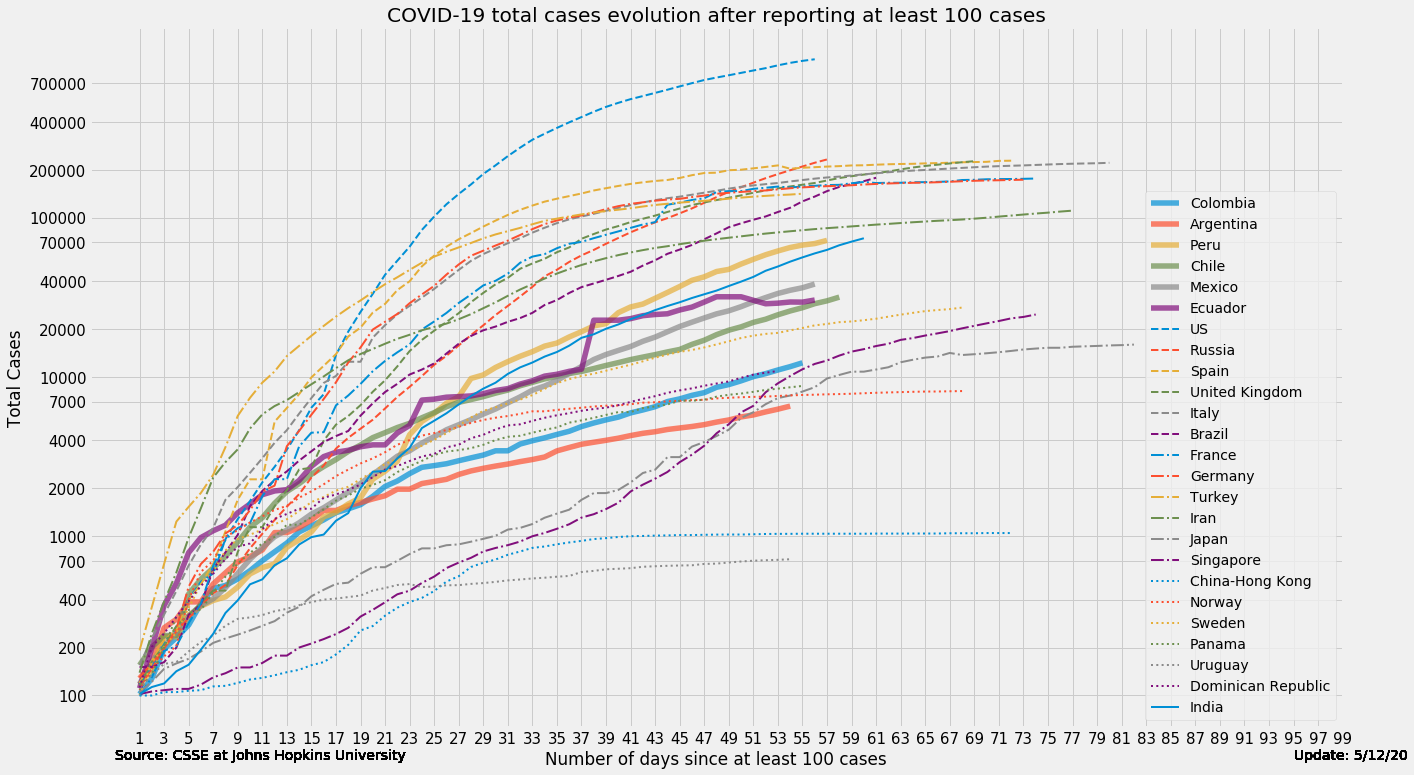

In [38]:
fig, ax = plt.subplots(figsize=(20,12))
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
colors = [f'C{i}' for i in range(6)]

low_cases = 100
high_cases = 1000000
max_periods = 100
ls = 0
count = 0
for name in names_to_plot:
    row = df.loc[name, :]
    if name in names_to_plot:
        if (row.min()<0.1*high_cases) & (name not in []):
            c_i = colors[count]
            ls_i = LINE_STYLES[ls]
            current_data = row[(row>=low_cases) & (row<=high_cases)]
            if len(current_data)>0:
                values_to_plot = current_data.values[:max_periods]
                if name in ['Colombia', 'Argentina', 'Peru', 'Chile', 'Mexico', 'Ecuador']:
                    ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=5.5, 
                            linestyle=ls_i, color=c_i, alpha=0.7)
                else:
                    ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=2., 
                            linestyle=ls_i, color=c_i)
            # Changing colors
            if count>4:
                count=0
                ls+=1
            else:
                count+=1
        else:
            pass
    ax.legend(fontsize=14, loc=4)
    ax.set_yscale('log')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_yticks([10**i*j*low_cases for j in [1,2, 4, 7] for i in np.arange(0, 4.0, 1.0) if 10**i*j*low_cases<1000000])
    ax.set_xticks(range(1, max_periods,2))
    ax.set_xlabel(f'Number of days since at least {low_cases} cases')
    ax.set_ylabel("Total Cases")
    ax.text(max_periods*0.95, low_cases*0.4, f'Update: {df.columns[-1]}')
    ax.text(-1, low_cases*0.4, 'Source: CSSE at Johns Hopkins University')
    ax.set_title(f"COVID-19 total cases evolution after reporting at least {low_cases} cases")
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
plt.show()